<a href="https://colab.research.google.com/github/AmirNBA9/MachineLearning/blob/master/Examin-Num01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ابتدا بايد ديتاست را بخوانيم

In [99]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/ML/modified-dataset.csv')

# تعداد رديف و ستون ها را بدست ميآوريم.
print(len(data))
print(len(data.columns))

395
26


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        388 non-null    object 
 1   sex           389 non-null    object 
 2   age           389 non-null    float64
 3   address       385 non-null    object 
 4   famsize       387 non-null    object 
 5   Pstatus       387 non-null    object 
 6   Medu          392 non-null    float64
 7   Fedu          387 non-null    float64
 8   Mjob          387 non-null    object 
 9   Fjob          387 non-null    object 
 10  guardian      383 non-null    object 
 11  traveltime    392 non-null    float64
 12  studytime     387 non-null    float64
 13  failures      387 non-null    float64
 14  Ssupport      388 non-null    object 
 15  Gsupport      390 non-null    object 
 16  feespaid      383 non-null    object 
 17  ecactivities  387 non-null    object 
 18  internet      386 non-null    

In [101]:
data.head(400)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,no,no,no,3.0,4.0,3.0,6.0,5.0,NaN,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,no,no,yes,3.0,3.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,yes,no,yes,3.0,2.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,yes,yes,yes,2.0,2.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,yes,no,no,NaN,2.0,5.0,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2.0,2.0,services,services,...,yes,no,no,5.0,4.0,4.0,11.0,9.0,9.0,9.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,...,no,no,yes,4.0,5.0,2.0,3.0,14.0,16.0,16.0
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,...,no,no,no,5.0,3.0,3.0,NaN,10.0,8.0,7.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,no,no,yes,4.0,1.0,5.0,0.0,11.0,12.0,10.0


#توضيحات در خصوص ديتاست
 اين ديتاست شامل 395 سطر و 26 ستون است. كه از گوگل درايو خوانده ميشود.

 ## مقادير تهي
 باتوجه به وجود ديتا تهي، بنحوي بايد مشكل مقادير تهي را در اين ديتاست مرتفع نمود.
  طبق بررسي ها همه ستون ها مقادير تهي دارند.

In [102]:
# بررسي اينكه چه ستون هايي مقدار تهي دارند
# 1. يافتن ليستي از نام هاي ستون ها
list = []
for col in data.columns:
    list.append(col)
# 2. بررسي نام تعداد تهي در ستون ها
data[list].isnull().sum()

school           7
sex              6
age              6
address         10
famsize          8
Pstatus          8
Medu             3
Fedu             8
Mjob             8
Fjob             8
guardian        12
traveltime       3
studytime        8
failures         8
Ssupport         7
Gsupport         5
feespaid        12
ecactivities     8
internet         9
freetime         9
goout           12
health           8
absences         9
G1               5
G2              11
G3               7
dtype: int64

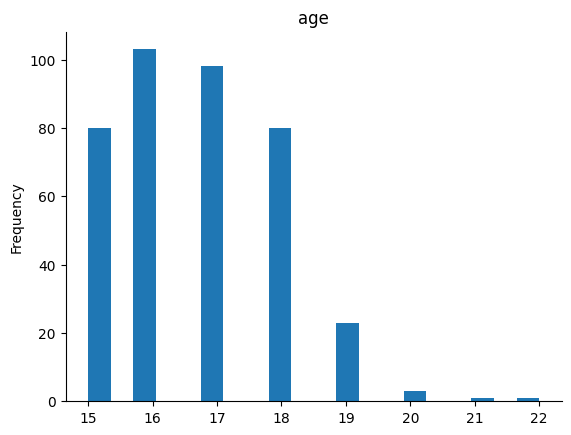

In [103]:
from matplotlib import pyplot as plt

data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data cleansing
## پر كردن مقادير تهي
## تبديل كردن داده هاي متني به عددي

In [104]:
data['sex'] = data['sex'].replace(['F','M'],[0,1])
data['feespaid'] = data['feespaid'].replace(['no','yes'],[0,1])
data['ecactivities'] = data['ecactivities'].replace(['no','yes'],[0,1])
data['internet'] = data['internet'].replace(['no','yes'],[0,1])
data['school'] = data['school'].replace(['GP','MS'],[0,1])
data['famsize'] = data['famsize'].replace(['GT3','LE3'],[0,1])
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,0.0,0.0,18.0,U,0.0,A,4.0,4.0,at_home,teacher,...,0.0,0.0,0.0,3.0,4.0,3.0,6.0,5.0,NaN,6.0
1,0.0,0.0,17.0,U,0.0,T,1.0,1.0,at_home,other,...,0.0,0.0,1.0,3.0,3.0,3.0,4.0,5.0,5.0,6.0
2,0.0,0.0,15.0,U,1.0,T,1.0,1.0,at_home,other,...,1.0,0.0,1.0,3.0,2.0,3.0,10.0,7.0,8.0,10.0
3,0.0,0.0,15.0,U,0.0,T,4.0,2.0,health,services,...,1.0,1.0,1.0,2.0,2.0,5.0,2.0,15.0,14.0,15.0
4,0.0,0.0,16.0,U,0.0,T,3.0,3.0,other,other,...,1.0,0.0,0.0,NaN,2.0,5.0,4.0,6.0,10.0,10.0
5,0.0,1.0,16.0,U,1.0,T,4.0,NaN,services,other,...,1.0,1.0,NaN,4.0,2.0,5.0,10.0,15.0,15.0,15.0
6,0.0,1.0,16.0,U,1.0,T,2.0,2.0,other,other,...,0.0,0.0,1.0,4.0,4.0,3.0,0.0,12.0,12.0,11.0
7,0.0,0.0,17.0,U,0.0,A,4.0,4.0,other,teacher,...,0.0,0.0,0.0,1.0,4.0,1.0,NaN,6.0,5.0,6.0
8,0.0,1.0,15.0,U,1.0,A,3.0,2.0,services,other,...,1.0,0.0,1.0,2.0,2.0,1.0,0.0,16.0,NaN,19.0
9,0.0,1.0,15.0,U,0.0,T,3.0,4.0,other,other,...,1.0,1.0,1.0,5.0,1.0,5.0,0.0,14.0,15.0,15.0


# پر کردن دیتا با استفاده از روش KNN

در این روش از دیتاهای نزدیک یا همسایه استفاده میشود. که در این تمرین فقط یک مورد را با این مدل پر میکنیم.

In [105]:
from sklearn.impute import KNNImputer as knn

imputer = knn(n_neighbors=2)
data['internet'] = imputer.fit_transform(data['internet'].values.reshape(-1, 1))

data.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,0.0,0.0,18.0,U,0.0,A,4.0,4.0,at_home,teacher,...,0.0,0.0,0.000000,3.0,4.0,3.0,6.0,5.0,NaN,6.0
1,0.0,0.0,17.0,U,0.0,T,1.0,1.0,at_home,other,...,0.0,0.0,1.000000,3.0,3.0,3.0,4.0,5.0,5.0,6.0
2,0.0,0.0,15.0,U,1.0,T,1.0,1.0,at_home,other,...,1.0,0.0,1.000000,3.0,2.0,3.0,10.0,7.0,8.0,10.0
3,0.0,0.0,15.0,U,0.0,T,4.0,2.0,health,services,...,1.0,1.0,1.000000,2.0,2.0,5.0,2.0,15.0,14.0,15.0
4,0.0,0.0,16.0,U,0.0,T,3.0,3.0,other,other,...,1.0,0.0,0.000000,NaN,2.0,5.0,4.0,6.0,10.0,10.0
5,0.0,1.0,16.0,U,1.0,T,4.0,NaN,services,other,...,1.0,1.0,0.829016,4.0,2.0,5.0,10.0,15.0,15.0,15.0
6,0.0,1.0,16.0,U,1.0,T,2.0,2.0,other,other,...,0.0,0.0,1.000000,4.0,4.0,3.0,0.0,12.0,12.0,11.0


In [106]:
data["Fedu"].fillna( method ='ffill', inplace = True)
data["Medu"].fillna( method ='ffill', inplace = True)
data["Fedu"].fillna( method ='ffill', inplace = True)
data["G1"].fillna( method ='ffill', inplace = True)
data["G3"].fillna( method ='ffill', inplace = True)
data["feespaid"].fillna( method ='ffill', inplace = True)
data["ecactivities"].fillna( method ='ffill', inplace = True)
data["freetime"].fillna( method ='ffill', inplace = True)
data["goout"].fillna( method ='ffill', inplace = True)
data["health"].fillna( method ='ffill', inplace = True)
data["sex"].fillna( method ='ffill', inplace = True)
data["age"].fillna( method ='ffill', inplace = True)
data["address"].fillna( method ='ffill', inplace = True)
data["famsize"].fillna( method ='ffill', inplace = True)
data["Pstatus"].fillna( method ='ffill', inplace = True)
data["guardian"].fillna( method ='ffill', inplace = True)
data["traveltime"].fillna( method ='ffill', inplace = True)
data["studytime"].fillna( method ='ffill', inplace = True)
data["failures"].fillna( method ='ffill', inplace = True)
data["Ssupport"].fillna( method ='ffill', inplace = True)
data["Gsupport"].fillna( method ='ffill', inplace = True)
data["absences"].fillna( method ='ffill', inplace = True)
data["Mjob"].fillna( method ='ffill', inplace = True)
data["Fjob"].fillna( method ='ffill', inplace = True)
data['school'].fillna( method ='ffill', inplace = True)
data['G2'].fillna(data['G2'].median , inplace=True)
data.head(7)

RecursionError: ignored

RecursionError: ignored

In [107]:
list = []
for col in data.columns:
    list.append(col)
# 2. بررسي نام تعداد تهي در ستون ها
data[list].isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
guardian        0
traveltime      0
studytime       0
failures        0
Ssupport        0
Gsupport        0
feespaid        0
ecactivities    0
internet        0
freetime        0
goout           0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        395 non-null    float64
 1   sex           395 non-null    float64
 2   age           395 non-null    float64
 3   address       395 non-null    object 
 4   famsize       395 non-null    float64
 5   Pstatus       395 non-null    object 
 6   Medu          395 non-null    float64
 7   Fedu          395 non-null    float64
 8   Mjob          395 non-null    object 
 9   Fjob          395 non-null    object 
 10  guardian      395 non-null    object 
 11  traveltime    395 non-null    float64
 12  studytime     395 non-null    float64
 13  failures      395 non-null    float64
 14  Ssupport      395 non-null    object 
 15  Gsupport      395 non-null    object 
 16  feespaid      395 non-null    float64
 17  ecactivities  395 non-null    float64
 18  internet      395 non-null    

تا اینجا همه دیتاهای تهی تعیین تکلیف شدند
به سراغ حل ميرويم

از مپ، مديان و ديكشنري هم ميتوان استفاده نمود.

#ترسيم توزيع ديتا

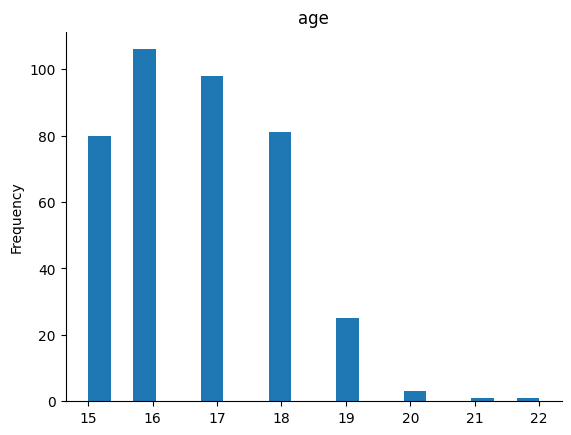

In [109]:
from matplotlib import pyplot as plt

data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

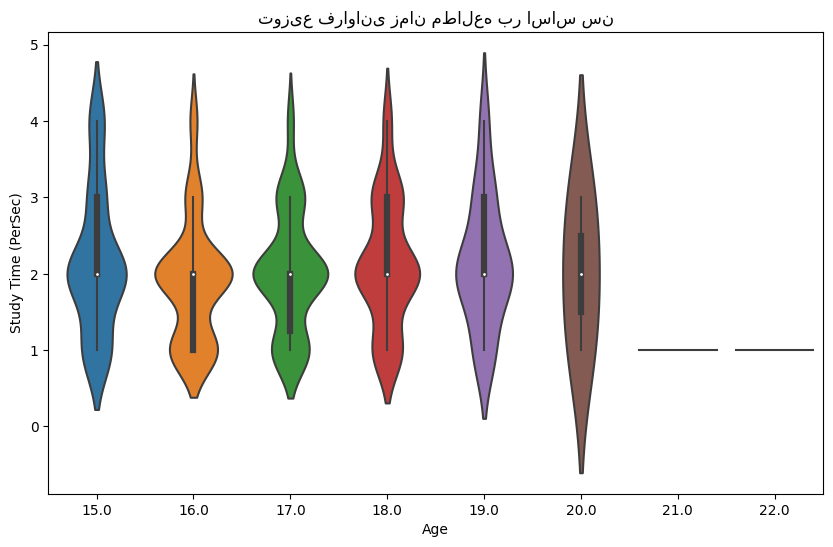

In [110]:
import seaborn as sns

df = pd.DataFrame(data)

# برای رسم نمودار میله ای، از seaborn استفاده می‌کنیم:
plt.figure(figsize=(10, 6))
sns.violinplot(x='age', y='studytime', data=df)
plt.title('توزیع فراوانی زمان مطالعه بر اساس سن')
plt.xlabel('Age')
plt.ylabel('Study Time (PerSec)')
plt.show()

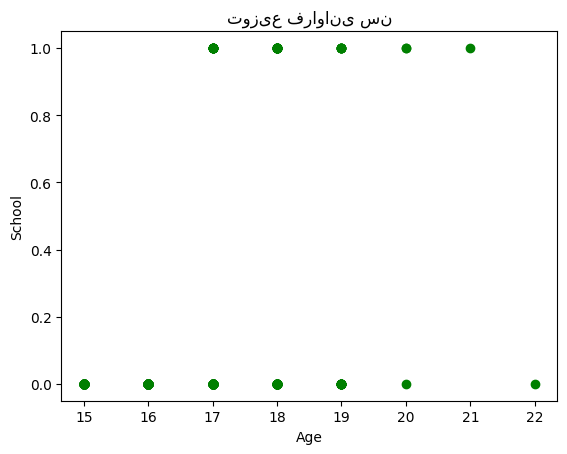

In [111]:
plt.scatter(data['age'], data['school'], color='green')
plt.title('توزیع فراوانی سن')
plt.ylabel('School') # 0=GP 1=MS
plt.xlabel('Age')
plt.show()

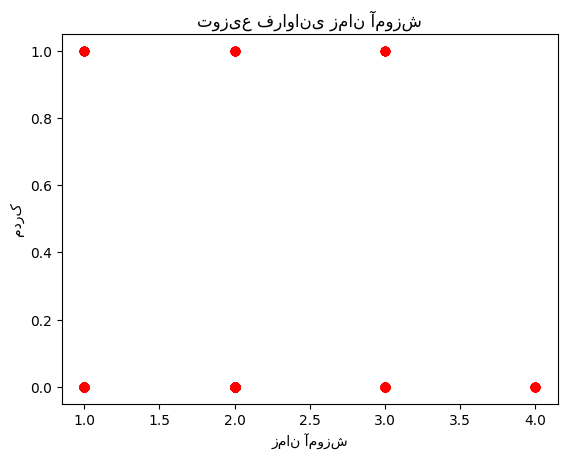

In [112]:
plt.scatter(data['studytime'], data['school'], color='red')
plt.title('توزیع فراوانی زمان آموزش')
plt.ylabel('مدرک') # 0=GP 1=MS
plt.xlabel('زمان آموزش')
plt.show()

#بررسي تعداد و انواع مدارس

In [113]:
unique_schools = data['famsize'].unique()
#print(unique_schools)

counts = data['famsize'].value_counts()
print(counts)

unique_schools = data['school'].unique()
#print(unique_schools)

counts = data['school'].value_counts()
print(counts)

0.0    279
1.0    116
Name: famsize, dtype: int64
0.0    349
1.0     46
Name: school, dtype: int64


# ساخت پلات

روش های محتلفی برای پلات کردن داریم، اما برای نمایش زیباتر و قابل فهم تر از هیستوگراف استفاده میکنیم. اما سایر موارد را کامنت کردم که وجود داشته باشد.

array([[<Axes: title={'center': 'G3'}>,
        <Axes: title={'center': 'famsize'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'studytime'}>]], dtype=object)

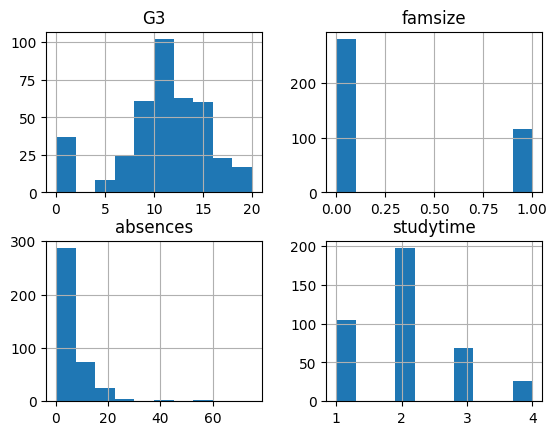

In [122]:
# df = pd.DataFrame(data, columns=["G3","famsize", "absences", "studytime"])

# # plot the dataframe
# df.plot(x="G3", y=["famsize","absences", "studytime"], kind="bar", figsize=(20, 5))

# # print bar graph
# plt.show()

# df = pd.DataFrame(data, columns=["G3","famsize", "absences", "studytime"])

# Plot the dataframe as a bar graph
# df.plot(x="G3", y=["famsize","absences", "studytime"], kind="bar", figsize=(20, 5))

# Show the bar graph
# plt.show()

# Plot histograms for each column separately
df.hist(column=["G3", "famsize", "absences", "studytime"])

# Show the histograms
# plt.show()

# با استفاده از الگوریتم Regression Linear یک مدل یادگیری ماشین را مرحله به مرحله طبق زیر آموزش دهید



In [115]:
from sklearn.model_selection import train_test_split

# بايد مقادير آرايه اي باشند
x = data['feespaid'].replace(['no','yes'],[0,1]).to_numpy().reshape(-1,1)
y= data['absences'].to_numpy().reshape(-1,1)

# چهار ورودي ميگيرد
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

print(x.shape)
print(y.shape)

(395, 1)
(395, 1)


## خواندن پارامتر ها
1. **fit_interceptbool, default=True**
  * Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
2. **copy_Xbool, default=True**
  * If True, X will be copied; else, it may be overwritten.
3. **n_jobsint, default=None**
  * The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

4. **positivebool, default=False**
  * When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

In [128]:
#linear regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

score_reg = lr_model.score(x_test, y_test)
print(score_reg)

-0.012039160713057662


كشف دقت

In [133]:
from sklearn.metrics import mean_squared_error

# پیش‌بینی مقادیر
y_pred = lr_model.predict(x_test)

# محاسبه دقت
mse = mean_squared_error(y_test, y_pred)
print(mse)

53.10136038454518


NameError: ignored

In [118]:
lr_model.coef_

array([[0.03560076]])

In [119]:
lr_model.intercept_

array([5.92307692])